[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Time_Series/blob/main/W13/W13P1.ipynb)



In [3]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels
from statsmodels.tsa.arima_process import arma_generate_sample

In [5]:
ar_coeff = np.array([1/2, -1/2])
ma_coeff = np.array([1,1, 1/2])
ts = arma_generate_sample(np.r_[1, -ar_coeff], ma_coeff, nsample = 5000)

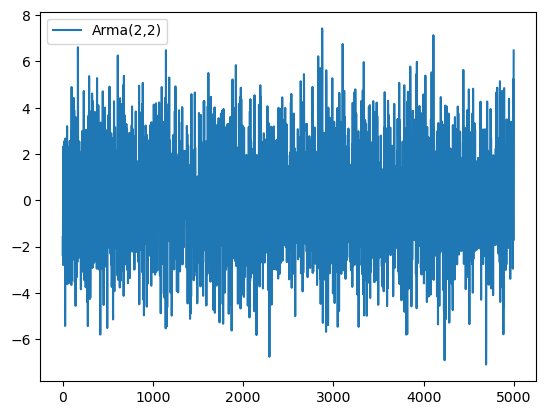

In [7]:
plt.plot(ts, label = "Arma(2,2)")
plt.legend()
plt.show()

In [16]:
ts[1000:1150] += np.random.randn(150)

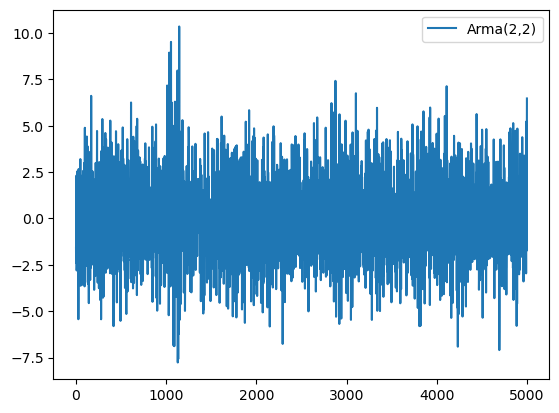

In [17]:
plt.plot(ts, label = "Arma(2,2)")
plt.legend()
plt.show()

In [22]:
def patch(ts:np.ndarray, m:int = 30, p:float = 2.0)->np.ndarray:
    L = []
    for i in range(ts.shape[0]-m-1):
        var = (abs(ts[i:i+m].std(ddof = 1)-ts[i+1:i+1+m].std(ddof = 1)))**p
        L.append(var)
    return np.asarray(L)
        
        

In [58]:
ts_ = patch(ts, p = 2)

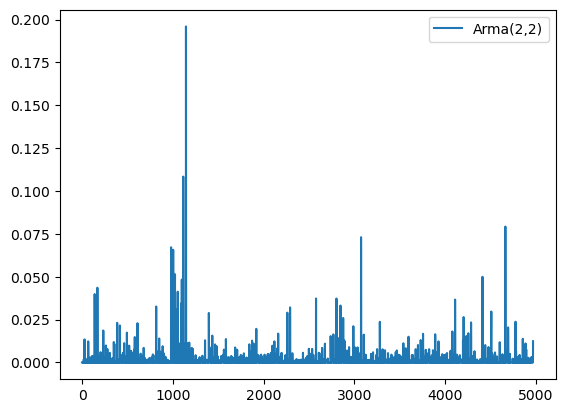

In [44]:
plt.plot(ts_, label = "Arma(2,2)")
plt.legend()
plt.show()

In [36]:
np.where(ts_>0.055)[0] + 30  ## Problematic places !!!!

array([1010, 1033, 1144, 1174, 3103, 4693], dtype=int64)

In [52]:
ts[1000:1150] = np.nan ##We set these dudes freee!!!!

In [77]:
ts__ = pd.Series(ts).interpolate(method='polynomial', order=1)

In [78]:
ts__ = np.asarray(ts__)

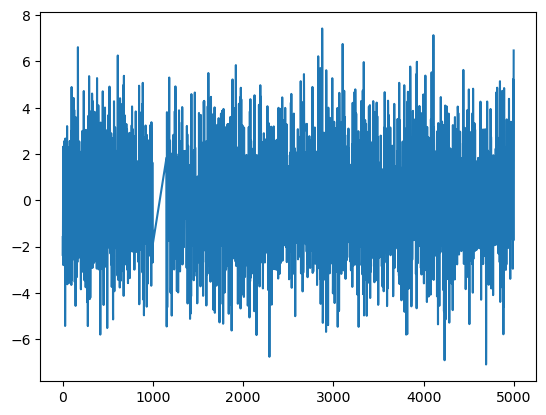

In [79]:
plt.plot(ts__)

In [72]:
ts__ = patch(ts__, p = 2)

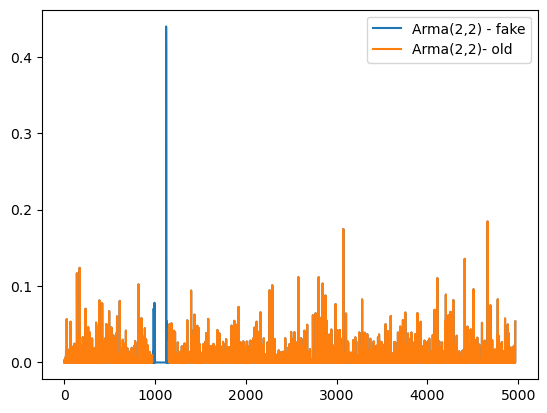

In [73]:
plt.plot(ts__, label = "Arma(2,2) - fake")
plt.plot(ts_, label = "Arma(2,2)- old")
plt.legend()
plt.show()